# HW 5 - Arthi Seetharaman

# Dataset Selection

I am using the COVID-19 Image dataset for this:
https://www.kaggle.com/datasets/pranavraikokte/covid19-image-dataset?resource=download

# Task 1

# Part 1 - CNN

In [30]:
#Importing necessary Libraries
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

Loading Dataset

In [52]:
#Rescaling Images
train_img = ImageDataGenerator(rescale=1./255, validation_split=0.3)
test_img = ImageDataGenerator(rescale=1./255)

In [53]:
#Loading in the data from directory
train_dir = 'Covid19-dataset/train'
test_dir = 'Covid19-dataset/test'

#Initializing parameters
batch_num = 32
img_height = 180
img_width = 180

#Creating training, validation, and testing splits
train = train_img.flow_from_directory(train_dir, subset="training", target_size = (img_height, img_width), batch_size = batch_num, class_mode='categorical')  
val = train_img.flow_from_directory(train_dir, subset="validation", target_size = (img_height, img_width), batch_size = batch_num, class_mode='categorical')  
test = test_img.flow_from_directory(test_dir,target_size = (img_height, img_width), batch_size = batch_num, class_mode='categorical')  

Found 176 images belonging to 3 classes.
Found 75 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


Visualizing Data

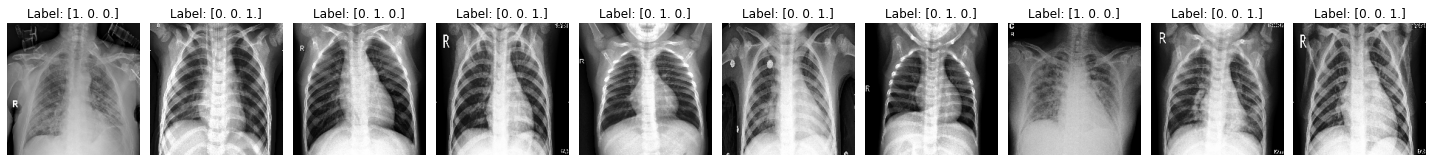

In [54]:
#Getting images
x_batch, y_batch = next(train)

#Plotting Images with 1 to indicate the class
def plot_imgs(images, labels):
    
    fig, axes = plt.subplots(1, 10, figsize=(20,20))
    axes = axes.flatten()
    
    for img, label, ax in zip(images, labels, axes):
        
        ax.imshow(img)
        ax.axis('off')
        ax.set_title(f"Label: {label}")
        
    plt.tight_layout()
    plt.show()

plot_imgs(x_batch[:10], y_batch[:10])  


CNN Implementation

In [68]:
CNN = Sequential([
    Conv2D(64, (3, 3), activation='relu', input_shape=(180, 180, 3)),
    MaxPooling2D(2, 2),
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(3, activation='softmax')
])

In [69]:
#Compiling Model
CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
history = CNN.fit(train, epochs = 8, validation_data = val)

Epoch 1/8
6/6 [==============================] - 13s 2s/step - loss: 2.2212 - accuracy: 0.4261 - val_loss: 1.0608 - val_accuracy: 0.4400
Epoch 2/8
6/6 [==============================] - 10s 2s/step - loss: 0.9023 - accuracy: 0.7216 - val_loss: 0.5717 - val_accuracy: 0.7867
Epoch 3/8
6/6 [==============================] - 11s 2s/step - loss: 0.3455 - accuracy: 0.9091 - val_loss: 0.3663 - val_accuracy: 0.8533
Epoch 4/8
6/6 [==============================] - 11s 2s/step - loss: 0.2304 - accuracy: 0.9091 - val_loss: 0.2971 - val_accuracy: 0.8933
Epoch 5/8
6/6 [==============================] - 11s 2s/step - loss: 0.1299 - accuracy: 0.9489 - val_loss: 0.2851 - val_accuracy: 0.8800
Epoch 6/8
6/6 [==============================] - 11s 2s/step - loss: 0.1479 - accuracy: 0.9375 - val_loss: 0.2134 - val_accuracy: 0.9067
Epoch 7/8
6/6 [==============================] - 11s 2s/step - loss: 0.0703 - accuracy: 0.9659 - val_loss: 0.3695 - val_accuracy: 0.8667
Epoch 8/8
6/6 [==========================

In [71]:
#Evaluating model
model_eval = CNN.evaluate(test)
print(f'Test Loss: {model_eval[0]}, Test Accuracy: {model_eval[1]}')

3/3 [==============================] - 1s 345ms/step - loss: 0.2292 - accuracy: 0.9091
Test Loss: 0.22921596467494965, Test Accuracy: 0.9090909361839294


The structure of the model was based on both trial and error and the literature. I first started of the model with a stack of 3 2d-Convolutions and Max Pooling layers. With this structure, I was unable to reach a test accuracy above 90%. I then removed a layer since adding a layer would most likely impact the model negatively and the accuracy reached above 90%. The model is flattened and then there is a final dense output layer.

- Test accuracy: 90.91%
- Training accuracy: 98.3% 
- Validation accuracy: 92%

- Test Loss: 0.229
- Training Loss: 0.0527
- Validation Loss: 0.2787

# Part 2 - ResNet50

In [76]:
#Importing necessary libraries
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

In [74]:
#Using ResNet50's preprocessing function
train_img_resnet = ImageDataGenerator(preprocessing_function = preprocess_input, validation_split=0.3)
test_img_resnet = ImageDataGenerator(preprocessing_function = preprocess_input)

In [75]:
#Initializing parameters
batch_num = 32
img_height = 180
img_width = 180

#Creating training, validation, and testing splits
train_resnet = train_img_resnet.flow_from_directory(train_dir, subset="training", target_size = (img_height, img_width), batch_size = batch_num, class_mode='categorical')  
val_resnet = train_img_resnet.flow_from_directory(train_dir, subset="validation", target_size = (img_height, img_width), batch_size = batch_num, class_mode='categorical')  
test_resnet = test_img_resnet.flow_from_directory(test_dir,target_size = (img_height, img_width), batch_size = batch_num, class_mode='categorical')  

Found 176 images belonging to 3 classes.
Found 75 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [82]:
#Loading pretrained weights but without top layer
initial = ResNet50(weights = 'imagenet', include_top = False, input_shape = (img_height, img_width, 3))

initial.trainable = False

vals = initial.output
vals = GlobalAveragePooling2D()(vals)
vals = Dense(128, activation = 'relu')(vals)
pred = Dense(3, activation = 'softmax')(vals) 

resnet = Model(inputs = initial.input, outputs = pred)

In [84]:
resnet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = resnet.fit(train_resnet, validation_data = val_resnet, epochs=8)

Epoch 1/8
6/6 [==============================] - 20s 3s/step - loss: 0.9068 - accuracy: 0.6080 - val_loss: 0.5460 - val_accuracy: 0.8000
Epoch 2/8
6/6 [==============================] - 15s 3s/step - loss: 0.3063 - accuracy: 0.8750 - val_loss: 0.2996 - val_accuracy: 0.9200
Epoch 3/8
6/6 [==============================] - 14s 2s/step - loss: 0.1666 - accuracy: 0.9318 - val_loss: 0.1939 - val_accuracy: 0.9733
Epoch 4/8
6/6 [==============================] - 14s 2s/step - loss: 0.1106 - accuracy: 0.9602 - val_loss: 0.1832 - val_accuracy: 0.9600
Epoch 5/8
6/6 [==============================] - 15s 3s/step - loss: 0.0463 - accuracy: 0.9830 - val_loss: 0.2365 - val_accuracy: 0.9600
Epoch 6/8
6/6 [==============================] - 15s 3s/step - loss: 0.0246 - accuracy: 1.0000 - val_loss: 0.1835 - val_accuracy: 0.9467
Epoch 7/8
6/6 [==============================] - 15s 3s/step - loss: 0.0233 - accuracy: 0.9943 - val_loss: 0.1717 - val_accuracy: 0.9733
Epoch 8/8
6/6 [==========================

In [85]:
#Evaluating model
resnet_eval = resnet.evaluate(test_resnet)
print(f'Test Loss: {resnet_eval[0]}, Test Accuracy: {resnet_eval[1]}')

3/3 [==============================] - 3s 688ms/step - loss: 0.1027 - accuracy: 0.9697
Test Loss: 0.10273998975753784, Test Accuracy: 0.9696969985961914


- Test accuracy: 96.97%
- Training accuracy: 99.43% 
- Validation accuracy: 97.33%

- Test Loss: 0.1027
- Training Loss: 0.0164
- Validation Loss: 0.1998
    
The ResNet accuracies are 4-5% higher than the CNN model accuracies. The losses are also lower. This increase in results can be attributed to many factors of the ResNet 50 model:

1. The Resnet Model is deeper which means it can learn more complex patterns.
2. Renset has residual connections. This allows adding layers to only improve or retain the model, not make it worse. 
3. The Resnet model is also pretrained on a large image dataset. Due to its learning on the dataset, the model will have a significantly better performance.

# Part 3 - Data Augmentation

In [91]:
#Data Augmentation
train_img_aug = ImageDataGenerator(
    rescale=1./255,
    rotation_range = 30, 
    width_shift_range = 0.3,  
    height_shift_range = 0.3,    
    validation_split = 0.3)

In [92]:
#Initializing parameters
batch_num = 32
img_height = 180
img_width = 180

#Creating training, validation, and testing splits
train_aug = train_img_aug.flow_from_directory(train_dir, subset="training", target_size = (img_height, img_width), batch_size = batch_num, class_mode='categorical')  
val_aug = train_img_aug.flow_from_directory(train_dir, subset="validation", target_size = (img_height, img_width), batch_size = batch_num, class_mode='categorical')  
test_aug = test_img.flow_from_directory(test_dir,target_size = (img_height, img_width), batch_size = batch_num, class_mode='categorical')  

Found 176 images belonging to 3 classes.
Found 75 images belonging to 3 classes.
Found 66 images belonging to 3 classes.


In [93]:
#Compiling Model
CNN.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [96]:
#Training model
history = CNN.fit(train_aug, epochs = 8, validation_data = val_aug)

Epoch 1/8
6/6 [==============================] - 14s 2s/step - loss: 0.4379 - accuracy: 0.8182 - val_loss: 0.4057 - val_accuracy: 0.8267
Epoch 2/8
6/6 [==============================] - 12s 2s/step - loss: 0.4074 - accuracy: 0.8182 - val_loss: 0.3797 - val_accuracy: 0.8533
Epoch 3/8
6/6 [==============================] - 13s 2s/step - loss: 0.4042 - accuracy: 0.8352 - val_loss: 0.5580 - val_accuracy: 0.7600
Epoch 4/8
6/6 [==============================] - 12s 2s/step - loss: 0.5002 - accuracy: 0.7670 - val_loss: 0.4345 - val_accuracy: 0.8667
Epoch 5/8
6/6 [==============================] - 12s 2s/step - loss: 0.4437 - accuracy: 0.8068 - val_loss: 0.4947 - val_accuracy: 0.8133
Epoch 6/8
6/6 [==============================] - 12s 2s/step - loss: 0.4463 - accuracy: 0.8011 - val_loss: 0.5253 - val_accuracy: 0.8000
Epoch 7/8
6/6 [==============================] - 13s 2s/step - loss: 0.3965 - accuracy: 0.8523 - val_loss: 0.5143 - val_accuracy: 0.8267
Epoch 8/8
6/6 [==========================

In [97]:
#Evaluating model
aug_model_eval = CNN.evaluate(test_aug)
print(f'Test Loss: {aug_model_eval[0]}, Test Accuracy: {aug_model_eval[1]}')

3/3 [==============================] - 1s 331ms/step - loss: 0.7295 - accuracy: 0.7424
Test Loss: 0.7295465469360352, Test Accuracy: 0.7424242496490479


- Test accuracy: 74.24%
- Training accuracy: 85.23% 
- Validation accuracy: 77.33%%

- Test Loss: 0.7295
- Training Loss: 0.3592
- Validation Loss: 0.6189
    
The accuracies decreased significantly and losseses increases as well. The data augmentation increased the complexity of the dataset, making the model perform worse. I tried to increase the number of epochs since I guessed that a reason could be not enough training, but that had little to no effect on the results.

Ways to increase the accuracy would be to add more layers to the model to make it deeper or use L1 or L2 regularization.

# Task 2

# Part 1 - VAE

I am using the Fashion-MNIST dataset.
https://github.com/zalandoresearch/fashion-mnist

In [69]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [70]:
#Loading Fashion-MNIST dataset
(train_images, _), (test_images, _) = tf.keras.datasets.fashion_mnist.load_data()

print(len(train_images))
print(len(test_images))

60000
10000


In [71]:
def preprocess_images(images):
  images = images.reshape((images.shape[0], 28, 28, 1)) / 255.
  return np.where(images > .5, 1.0, 0.0).astype('float32')

train_images = preprocess_images(train_images)
test_images = preprocess_images(test_images)

In [72]:
train_size = 60000
batch_size = 32
test_size = 10000

In [73]:
#Batching and shuffling data
train_dataset = (tf.data.Dataset.from_tensor_slices(train_images)
                 .shuffle(train_size).batch(batch_size))
test_dataset = (tf.data.Dataset.from_tensor_slices(test_images)
                .shuffle(test_size).batch(batch_size))

In [98]:
class CVAE(tf.keras.Model):
  """Convolutional variational autoencoder."""

  # network architecture
  def __init__(self, latent_dim):
    super(CVAE, self).__init__()
    self.latent_dim = latent_dim
    self.encoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(28, 28, 1)),
            tf.keras.layers.Conv2D(
                filters=32, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Conv2D(
                filters=64, kernel_size=3, strides=(2, 2), activation='relu'),
            tf.keras.layers.Flatten(),
            # No activation
            tf.keras.layers.Dense(latent_dim + latent_dim),
        ]
    )
    
    #Decoder
    self.decoder = tf.keras.Sequential(
        [
            tf.keras.layers.InputLayer(input_shape=(latent_dim,)),
            tf.keras.layers.Dense(units=7*7*32, activation=tf.nn.relu),
            tf.keras.layers.Reshape(target_shape=(7, 7, 32)),
            tf.keras.layers.Conv2DTranspose(
                filters=64, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            tf.keras.layers.Conv2DTranspose(
                filters=32, kernel_size=3, strides=2, padding='same',
                activation='relu'),
            # No activation
            tf.keras.layers.Conv2DTranspose(
                filters=1, kernel_size=3, strides=1, padding='same'),
        ]
    )

  @tf.function
  def sample(self, eps=None):
    if eps is None:
      eps = tf.random.normal(shape=(100, self.latent_dim))
    return self.decode(eps, apply_sigmoid=True)

  def encode(self, x):
    mean, logvar = tf.split(self.encoder(x), num_or_size_splits=2, axis=1)
    return mean, logvar

  def reparameterize(self, mean, logvar):
    eps = tf.random.normal(shape=mean.shape)
    return eps * tf.exp(logvar * .5) + mean

  def decode(self, z, apply_sigmoid=False):
    logits = self.decoder(z)
    if apply_sigmoid:
      probs = tf.sigmoid(logits)
      return probs
    return logits

Loss function and Optimizer

In [75]:
optimizer = tf.keras.optimizers.Adam(1e-4)


def log_normal_pdf(sample, mean, logvar, raxis=1):
  log2pi = tf.math.log(2. * np.pi)
  return tf.reduce_sum(
      -.5 * ((sample - mean) ** 2. * tf.exp(-logvar) + logvar + log2pi),
      axis=raxis)


def compute_loss(model, x):
  mean, logvar = model.encode(x)
  z = model.reparameterize(mean, logvar)
  x_logit = model.decode(z)
  cross_ent = tf.nn.sigmoid_cross_entropy_with_logits(logits=x_logit, labels=x)
  logpx_z = -tf.reduce_sum(cross_ent, axis=[1, 2, 3])
  logpz = log_normal_pdf(z, 0., 0.)
  logqz_x = log_normal_pdf(z, mean, logvar)
  return -tf.reduce_mean(logpx_z + logpz - logqz_x)


@tf.function
def train_step(model, x, optimizer):
  """Executes one training step and returns the loss.

  This function computes the loss and gradients, and uses the latter to
  update the model's parameters.
  """
  with tf.GradientTape() as tape:
    loss = compute_loss(model, x)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

Training

In [76]:
epochs = 10
# set the dimensionality of the latent space to a plane for visualization later
latent_dim = 2
num_examples_to_generate = 16

# keeping the random vector constant for generation (prediction) so
# it will be easier to see the improvement.
random_vector_for_generation = tf.random.normal(
    shape=[num_examples_to_generate, latent_dim])
model = CVAE(latent_dim)

In [77]:
def generate_and_save_images(model, epoch, test_sample):
  mean, logvar = model.encode(test_sample)
  z = model.reparameterize(mean, logvar)
  predictions = model.sample(z)
  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
    plt.subplot(4, 4, i + 1)
    plt.imshow(predictions[i, :, :, 0], cmap='gray')
    plt.axis('off')

  # tight_layout minimizes the overlap between 2 sub-plots
  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [78]:
# Pick a sample of the test set for generating output images
assert batch_size >= num_examples_to_generate
for test_batch in test_dataset.take(1):
  test_sample = test_batch[0:num_examples_to_generate, :, :, :]

2024-03-14 16:20:02.737417: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


Epoch: 10, Test set ELBO: -193.43182373046875, time elapse for current epoch: 40.867209911346436


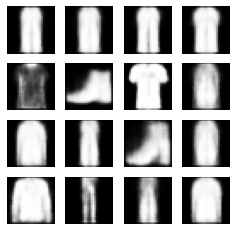

In [79]:
generate_and_save_images(model, 0, test_sample)

for epoch in range(1, epochs + 1):
  start_time = time.time()
  for train_x in train_dataset:
    train_step(model, train_x, optimizer)
  end_time = time.time()

  loss = tf.keras.metrics.Mean()
  for test_x in test_dataset:
    loss(compute_loss(model, test_x))
  elbo = -loss.result()
  display.clear_output(wait=False)
  print('Epoch: {}, Test set ELBO: {}, time elapse for current epoch: {}'
        .format(epoch, elbo, end_time - start_time))
  generate_and_save_images(model, epoch, test_sample)

In [80]:
def display_image(epoch_no):
  return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

(-0.5, 287.5, 287.5, -0.5)

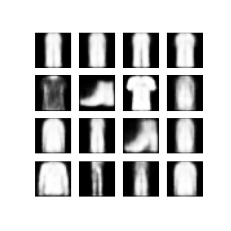

In [81]:
plt.imshow(display_image(epoch))
plt.axis('off')  # Display images

In [82]:
anim_file = 'cvae.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
  filenames = glob.glob('image*.png')
  filenames = sorted(filenames)
  for filename in filenames:
    image = imageio.imread(filename)
    writer.append_data(image)
  image = imageio.imread(filename)
  writer.append_data(image)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 182.5/182.5 kB 4.3 MB/s eta 0:00:00ta 0:00:01



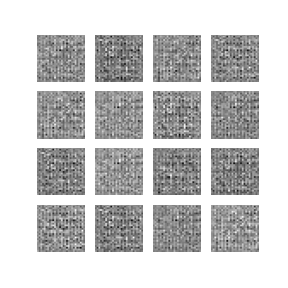

In [84]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

In [85]:
def plot_latent_images(model, n, digit_size=28):
  """Plots n x n digit images decoded from the latent space."""

  norm = tfp.distributions.Normal(0, 1)
  grid_x = norm.quantile(np.linspace(0.05, 0.95, n))
  grid_y = norm.quantile(np.linspace(0.05, 0.95, n))
  image_width = digit_size*n
  image_height = image_width
  image = np.zeros((image_height, image_width))

  for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
      z = np.array([[xi, yi]])
      x_decoded = model.sample(z)
      digit = tf.reshape(x_decoded[0], (digit_size, digit_size))
      image[i * digit_size: (i + 1) * digit_size,
            j * digit_size: (j + 1) * digit_size] = digit.numpy()

  plt.figure(figsize=(10, 10))
  plt.imshow(image, cmap='Greys_r')
  plt.axis('Off')
  plt.show()

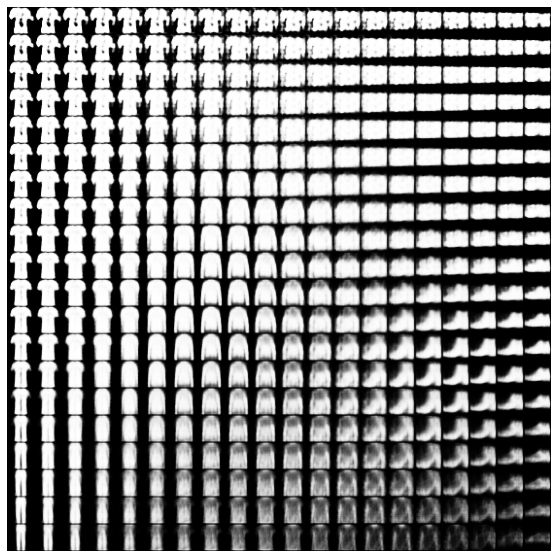

In [86]:
plot_latent_images(model, 20)

# Task 2 - GANs

In [189]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time

from IPython import display

In [190]:
#Loading fashion mnist dataset
(train_images, train_labels), (_, _) = tf.keras.datasets.fashion_mnist.load_data()

In [191]:
train_images = train_images.reshape(train_images.shape[0], 28, 28, 1).astype('float32')
train_images = (train_images - 127.5) / 127.5  # Normalize the images to [-1, 1]

In [192]:
BUFFER_SIZE = 60000
BATCH_SIZE = 256

# Batch and shuffle the data
train_dataset = tf.data.Dataset.from_tensor_slices(train_images).shuffle(BUFFER_SIZE).batch(BATCH_SIZE)

Generator

In [193]:
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(7*7*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((7, 7, 256)))
    assert model.output_shape == (None, 7, 7, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 7, 7, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 14, 14, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(1, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 28, 28, 1)

    return model

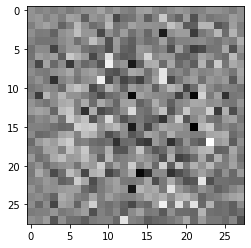

In [194]:
generator = make_generator_model()

noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

plt.imshow(generated_image[0, :, :, 0], cmap='gray')

Discriminator

In [195]:
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[28, 28, 1]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [196]:
discriminator = make_discriminator_model()
decision = discriminator(generated_image)
print (decision)

tf.Tensor([[0.00141234]], shape=(1, 1), dtype=float32)


Define loss and optimizer

In [197]:
# This method returns a helper function to compute cross entropy loss
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [198]:
#Discriminator loss
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [199]:
#Generator loss
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

Training

In [201]:
EPOCHS = 5
noise_dim = 100
num_examples_to_generate = 16

# You will reuse this seed overtime (so it's easier)
# to visualize progress in the animated GIF)
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [202]:
# Notice the use of `tf.function`
# This annotation causes the function to be "compiled".
@tf.function
def train_step(images):
    noise = tf.random.normal([BATCH_SIZE, noise_dim])

    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
      generated_images = generator(noise, training=True)

      real_output = discriminator(images, training=True)
      fake_output = discriminator(generated_images, training=True)

      gen_loss = generator_loss(fake_output)
      disc_loss = discriminator_loss(real_output, fake_output)

    gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
    gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)

    generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
    discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

In [203]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()

    for image_batch in dataset:
      train_step(image_batch)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,
                           seed)

In [204]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(4, 4))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, cmap='gray')
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

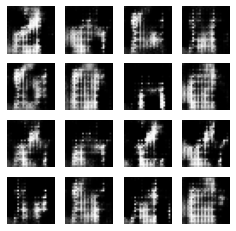

In [205]:
train(train_dataset, EPOCHS)

Used only 5 epochs instead of 50 due to how long the model takes to train. Hence, the images are still blurry.

# Task for 6000 level

1. https://paperswithcode.com/paper/u-net-convolutional-networks-for-biomedical

In this paper, data augmentation is used for training the U-net convolution network. The network architecture performs well with just using very few images by using a contracting path to capture context and a symmetric expanding path to enable precise localization.

The metric used in this paper is mean dice.

2. https://paperswithcode.com/paper/resunet-an-advanced-architecture-for-medical

This paper proposes ResUNet++, which is an improved version of ResUNet. This is a semantic segmentation neural network. This architecture also works well with a small number of images.

The metric used in this paper is mean dice.

Used this as a resource for my implementation: https://github.com/milesial/Pytorch-UNet

In [89]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import numpy as np
import os

In [157]:
image_dir = 'PNG/Original'
mask_dir = 'PNG/Ground_Truth'
subset_size=100 

#Transformations
transform = transforms.Compose([transforms.Resize((256, 256)),transforms.ToTensor(),])

#Loading dataset
filenames = [f for f in os.listdir(image_dir) if f.endswith('.png')]

if subset_size is not None and subset_size < len(filenames):
    filenames = np.random.choice(filenames, size = subset_size, replace = False)
    
dataset = []

for filename in filenames:
    img_path = os.path.join(image_dir, filename)
    mask_path = os.path.join(mask_dir, filename)
        
    image = Image.open(img_path).convert("RGB")
    mask = Image.open(mask_path).convert("L")
        
    if transform:
        image = transform(image)
        mask = transform(mask)
        
    dataset.append((image, mask))

In [158]:
dataloader = DataLoader(dataset, batch_size = 4, shuffle = True)

In [159]:
class DoubleConv(nn.Module):

    def __init__(self, in_channels, out_channels, mid_channels=None):
        
        super().__init__()
        
        if not mid_channels:
            mid_channels = out_channels
            
        self.double_conv = nn.Sequential(
            nn.Conv2d(in_channels, mid_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(mid_channels),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Dropout(0.2), 
            nn.Conv2d(mid_channels, out_channels, kernel_size=3, padding=1),
            nn.BatchNorm2d(out_channels),
            nn.LeakyReLU(0.2, inplace=True)
        )

    def forward(self, x):
        return self.double_conv(x)

In [160]:
class UNet(nn.Module):
    def __init__(self, n_channels, n_classes):
        super(UNet, self).__init__()
        self.n_channels = n_channels
        self.n_classes = n_classes

        self.inc = DoubleConv(n_channels, 64)
        self.down1 = nn.MaxPool2d(2)
        self.conv1 = DoubleConv(64, 128)
        self.down2 = nn.MaxPool2d(2)
        self.conv2 = DoubleConv(128, 256)
        self.down3 = nn.MaxPool2d(2)
        self.conv3 = DoubleConv(256, 512)

        self.up1 = nn.ConvTranspose2d(512, 256, kernel_size=2, stride=2)
        self.conv4 = DoubleConv(512, 256)
        self.up2 = nn.ConvTranspose2d(256, 128, kernel_size=2, stride=2)
        self.conv5 = DoubleConv(256, 128)
        self.up3 = nn.ConvTranspose2d(128, 64, kernel_size=2, stride=2)
        self.conv6 = DoubleConv(128, 64)

        self.outc = nn.Conv2d(64, n_classes, kernel_size=1)

    def forward(self, x):
        x1 = self.inc(x)
        x2 = self.down1(x1)
        x2 = self.conv1(x2)
        x3 = self.down2(x2)
        x3 = self.conv2(x3)
        x4 = self.down3(x3)
        x4 = self.conv3(x4)

        x5 = self.up1(x4)
        x5 = torch.cat([x5, x3], dim=1)
        x5 = self.conv4(x5)
        x6 = self.up2(x5)
        x6 = torch.cat([x6, x2], dim=1)
        x6 = self.conv5(x6)
        x7 = self.up3(x6)
        x7 = torch.cat([x7, x1], dim=1)
        x7 = self.conv6(x7)

        logits = self.outc(x7)
        
        return logits

In [161]:
def calc_dice(pred, target):
    
    smooth = 1.0  
    pred = torch.sigmoid(pred)  
    pred = (pred > 0.5).float() 
    intersection = (pred * target).sum()
    dice = (2. * intersection + smooth)/(pred.sum() + target.sum() + smooth)
    return dice

In [162]:
def training(model, dataloader, epochs):
    
    model.train()
    optimizer = optim.Adam(model.parameters(), lr = 0.00001)
    criterion = nn.BCEWithLogitsLoss()

    for epoch in range(epochs):
        
        running_loss = 0.0
        dice_score = 0.0
        
        for images, masks in dataloader:
            
            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, masks)
            loss.backward()
            optimizer.step()
            
            dice_score += calc_dice(outputs, masks).item()
            running_loss += loss.item()
            
            epoch_loss = running_loss/len(dataloader)
            epoch_dice = dice_score/len(dataloader)
            
        print(f"Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}, Mean Dice: {epoch_dice:.4f}")

model = UNet(n_channels = 3, n_classes = 1)
training(model, dataloader, epochs = 6)

Epoch 1/6, Loss: 0.6876, Mean Dice: 0.2004
Epoch 2/6, Loss: 0.6659, Mean Dice: 0.2730
Epoch 3/6, Loss: 0.6482, Mean Dice: 0.2922
Epoch 4/6, Loss: 0.6260, Mean Dice: 0.3150
Epoch 5/6, Loss: 0.6004, Mean Dice: 0.3557
Epoch 6/6, Loss: 0.5741, Mean Dice: 0.3902


The metric used in the 2 papers I am comparing is mean dice.

Paper 1 (UNet): 0.8230
Paper 2 (ResUNet++): 0.7955
My Results: 0.3902

This low result could be due to the small sample size I took.